# Loading data with Python

## 1. Load GeoTIFF as NumpyArray

### 1.1 Check python version and load packages

In [1]:
# check current python version and environment
!python --version
!where python 

Python 3.13.0
c:\Users\simon\anaconda3\envs\test_environment\python.exe
C:\Users\simon\anaconda3\python.exe
C:\Users\simon\AppData\Local\Microsoft\WindowsApps\python.exe


In [186]:
# used python-interpreter
import sys
print(sys.executable)

c:\Users\simon\anaconda3\envs\test_environment\python.exe


In [187]:
# install and import required rasterio package
try:
    import rasterio
except:
    %pip install rasterio
    import rasterio

In [188]:
import rasterio.features
import rasterio.warp

### 1.2 Load GeoTIFF with Dataset.Reader = src

In [189]:
# load file path of first GeoTIFF
file_path = r"D:\Drohne\1_OHB\1_OHB_Normalbetrieb\1_OHB_September_2021\Outputs\GeoTIFF\Abschnitt_01_tif.tif"

In [190]:
try:
    with rasterio.open(file_path) as src: # src = stored DatasetReader-object > is able to read raster and meta data 
        OHB1_Sept21_ABO1_data = src.read()  # reads raster data as NumPy-Array
        OHB1_Sept21_ABO1_profile = src.profile  # meta data like coordinate system, resolution, datatype
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the path.")
except rasterio.errors.RasterioIOError as e:
    print(f"Error: Could not open the GeoTIFF file. {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [7]:
print(OHB1_Sept21_ABO1_data)
# OHB1_Sept21_ABO1_data.view()

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]]


### 1.3 Check properties of the NumpyArray

In [8]:
OHB1_Sept21_ABO1_data.shape, OHB1_Sept21_ABO1_data.dtype, type(OHB1_Sept21_ABO1_data)

((4, 35244, 17191), dtype('uint8'), numpy.ndarray)

In [9]:
print(dir(OHB1_Sept21_ABO1_data))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_namespace__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__buffer__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__'

In [10]:
OHB1_Sept21_ABO1_data.mean()


np.float64(176.89205050216543)

In [76]:
# coordninate system
crs_1 = src.crs
print(crs_1)
# geographical extent of the data (bounding box)
print(src.bounds)

# meta data
print(OHB1_Sept21_ABO1_profile)

EPSG:4326
BoundingBox(left=11.26459149229245, bottom=48.7455106686141, right=11.268291511222449, top=48.750527052866104)
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 17191, 'height': 35244, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(2.1522999999995117e-07, 0.0, 11.26459149229245,
       0.0, -1.4233300000006033e-07, 48.750527052866104), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [ ]:
import os
# all files in current directory
print(os.listdir("."))

['load_data_test.ipynb']


### 1.4 Plot Image with matplotlib

In [194]:
try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

In [43]:
# # test plot
# import numpy as np

# test_data = np.random.rand(10, 10)

# plt.imshow(test_data, cmap='gray')
# plt.colorbar()
# plt.title("matplotlib test")
# plt.show()

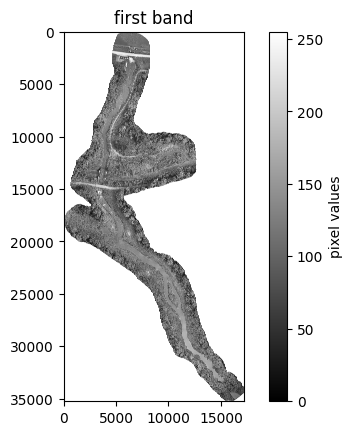

In [195]:
# plot the GeoTiff 
# plot the first band
plt.imshow(OHB1_Sept21_ABO1_data[0], cmap='gray')  # visalization with grey values
plt.colorbar(label='pixel values')
plt.title("first band")
plt.show()

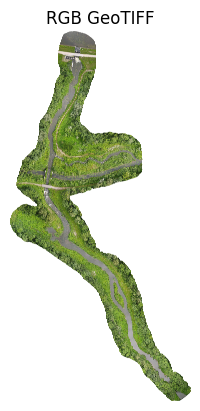

In [ ]:
if OHB1_Sept21_ABO1_data.shape[0] >= 3:  # check if 3 bands exist
    rgb_image = OHB1_Sept21_ABO1_data[:3].transpose(1, 2, 0)  # transpose bands
    plt.imshow(rgb_image)
    plt.title("RGB GeoTIFF")
    plt.axis('off')  # turn off axis representation
    plt.show()
else:
    print("GeoTIFF has less than three bands")

### 1.5 Check spatial properties of the image and crs

In [77]:
print(crs_1)

EPSG:4326


In [50]:
# spatial position of the upper left corner of the data
transform = src.transform
upper_left = transform * (0, 0)
print("Upper left corner:", upper_left)

Upper left corner: (11.26459149229245, 48.750527052866104)


In [59]:
OHB1_Sept21_ABO1_data.shape

(4, 35244, 17191)

In [64]:
# lower right corner
width = src.width
height = src.height
print(width, height)

lower_right = transform * (width - 1, height - 1)
print("Lower right corner:", lower_right)

17191 35244
Lower right corner: (11.26829129599245, 48.7455108109471)


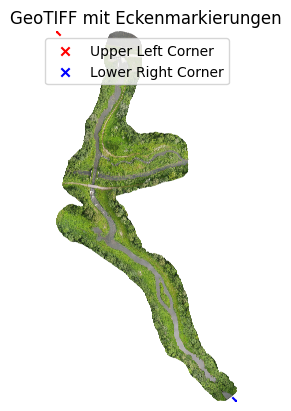

In [ ]:
# plot rgb image with lower right and upper left corner highlighted

plt.imshow(rgb_image)

# marker for upper left corner
plt.scatter(0, 0, color='red', marker='x', label="Upper Left Corner")
# marker for lower right corner
plt.scatter(width-1, height-1, color='blue', marker='x', label="Lower Right Corner")

plt.legend()
plt.axis('off')
plt.show()

### 1.6 Indexing on an NumpyArray

In [ ]:
# band 1
OHB1_Sept21_ABO1_data[0]
# band 2
OHB1_Sept21_ABO1_data[1]
#...
# band 4
OHB1_Sept21_ABO1_data[3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [74]:
OHB1_Sept21_ABO1_data.shape

(4, 35244, 17191)

In [ ]:
# single specific pixel value in band 1 (red band)
OHB1_Sept21_ABO1_data[0, 12000, 5000]

np.uint8(119)

## 2. Spatial Indexing

In [128]:
# get the value for the pixel ??m east and ??m south of the dataset's upper left corner
x_0, y_0 = (src.bounds.left, src.bounds.top)
print(f"Upper left corner at ({x_0}, {y_0})")

x, y = (src.bounds.left + 0.0018, src.bounds.top - 0.0019)
# row, col = src.index(x,y)
# print(row, col)
# OHB1_Sept21_ABO1_data[0, row, col]

if src.bounds.left <= x <= src.bounds.right and src.bounds.bottom <= y <= src.bounds.top:
        # calculate the pixel coordinates for (x, y) in GeoTIFF
        row, col = src.index(x, y)
        print(f"Row: {row}, Column: {col}")

        # pixel value for these coordinates in the first band
        pixel_value = OHB1_Sept21_ABO1_data[0, row, col]
        print(f"Pixel Value at ({x}, {y}):", pixel_value)
else:
        print("Coordinates out of raster boundary")

Upper left corner at (11.26459149229245, 48.750527052866104)
Row: 13348, Column: 8363
Pixel Value at (11.266391492292449, 48.748627052866105): 137


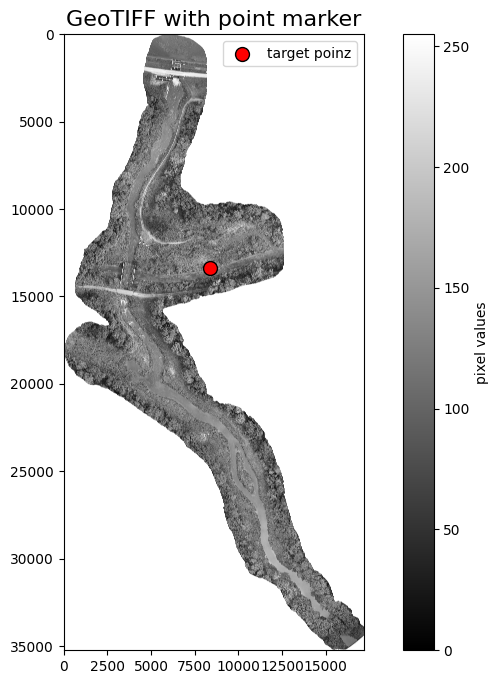

In [133]:
plt.figure(figsize=(10, 8))
plt.imshow(OHB1_Sept21_ABO1_data[0], cmap="gray")  
plt.colorbar(label="pixel values")
plt.title("GeoTIFF with point marker", fontsize=16)

if row is not None and col is not None:
    plt.scatter(col, row, color="red", label="target poinz", edgecolor="black", s=100)
    plt.legend()

plt.show()

In [127]:
# Longitude distance
delta_x = x - x_0
# Latitude distance
delta_y = y - y_0
delta_x, delta_y

(0.0017999999999993577, -0.0018999999999991246)

In [ ]:
# Conversion of degrees into meters


## 3. Load and examine class labels/ attribute table

### 3.1 Number of elements per class

In [106]:
import pandas as pd

In [134]:
class_labels = pd.read_csv(r"C:\Users\simon\Meine Ablage\Dokumente.GD\FS06 SS24\BACHELORARBEIT\MoSE\data\shapefiles\class_labels_geom_raw.csv")
class_counts = class_labels["Elementtyp"].value_counts()
class_counts

Elementtyp
Totholz              1176
Einzelstein           145
Wurzelstock           115
Schotterbank           32
Sand_Schlammbank       30
Steinverbauung          9
Steinriegel             4
Schlamm_Sandinsel       4
Schotterinsel           3
Name: count, dtype: int64

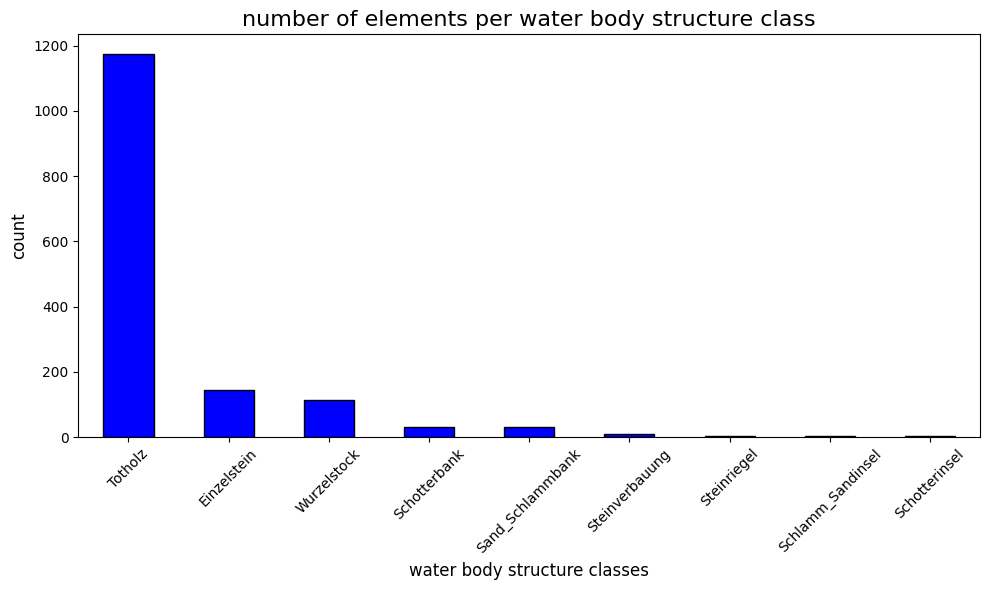

In [139]:
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title("number of elements per water body structure class", fontsize=16)
plt.xlabel("water body structure classes", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### 3.2 Size of the areas per class

In [140]:
# !pip install geopandas
import geopandas as gpd

In [174]:
shapefile_path = r"C:\Users\simon\Meine Ablage\Dokumente.GD\FS06 SS24\BACHELORARBEIT\MoSE\data\shapefiles\GSK_24_WGS84.shp"
class_labels_shp = gpd.read_file(shapefile_path)
class_labels_shp.head()

,GSK_Code,Elementtyp,Bemerkung,Shape_Leng,Shape_Area,s_length_m,s_area_m2,geometry
0,0,Einzelstein,None,0.000048,1.049525e-10,4.067303,0.858270,"POLYGON ((11.26591 48.75007, 11.26592 48.75007..."
1,0,Wurzelstock,None,0.000067,3.110861e-10,6.377553,2.543970,"POLYGON ((11.26592 48.75003, 11.26592 48.75004..."
2,0,Steinverbauung,None,0.000096,2.608730e-10,10.031798,2.133339,"POLYGON ((11.26587 48.75014, 11.26588 48.75014..."
3,0,Einzelstein,None,0.000045,1.338983e-10,3.992333,1.094979,"POLYGON ((11.26589 48.75014, 11.2659 48.75014,..."
4,0,Einzelstein,None,0.000039,9.948221e-11,3.427711,0.813535,"POLYGON ((11.26591 48.75013, 11.26592 48.75013..."


In [175]:
class_labels_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [176]:
# # Change to metric CRS (e.g. EPSG:3857 or UTM)
# # EPSG:3857 (Web Mercator)
# class_labels_shp_metric = class_labels_shp.to_crs(epsg=3857)  
# print("new CRS:", class_labels_shp_metric.crs)

In [177]:
# class_labels_shp_metric["s_area_m2_metric"] = class_labels_shp_metric["geometry"].area
# class_labels_shp_metric.head()

In [178]:
# areas of the labels 
# with old and new crs
class_labels_shp["s_area_m2"] #, class_labels_shp_metric["s_area_m2_metric"]

0       0.858270
1       2.543970
2       2.133339
3       1.094979
4       0.813535
          ...   
1515    0.150580
1516    0.400215
1517    0.000000
1518    0.000000
1519    0.000000
Name: s_area_m2, Length: 1520, dtype: float64

In [179]:
# add/sum up area per class labels 
area_per_class = class_labels_shp.groupby("Elementtyp")["s_area_m2"].sum()
# area_per_class_2 = class_labels_shp_metric.groupby("Elementtyp")["s_area_m2_metric"].sum()

# sort the classes in descending order
area_per_class = area_per_class.sort_values(ascending=False)
# area_per_class_2 = area_per_class_2.sort_values(ascending=False)
area_per_class #, area_per_class_2

Elementtyp
Totholz              2620.374433
Schotterbank          920.387251
Sand_Schlammbank      601.750936
Wurzelstock           214.169322
Schotterinsel         153.299032
Schlamm_Sandinsel     107.294373
Einzelstein            59.636654
Steinverbauung         33.422334
Steinriegel            21.964373
Name: s_area_m2, dtype: float64

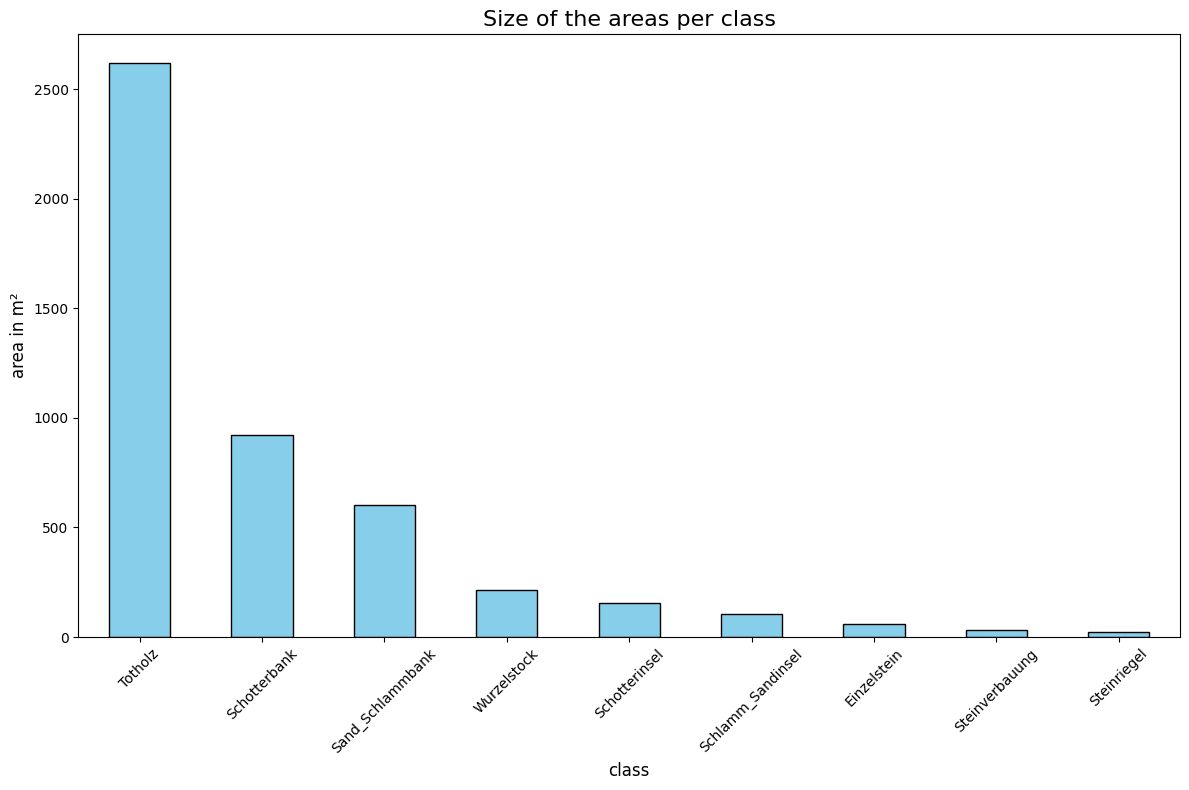

In [180]:
# area values with old crs
plt.figure(figsize=(12, 8))
area_per_class.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Size of the areas per class", fontsize=16)
plt.xlabel("class", fontsize=12)
plt.ylabel("area in m²", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.3 Compare areas and numbers of labels per class

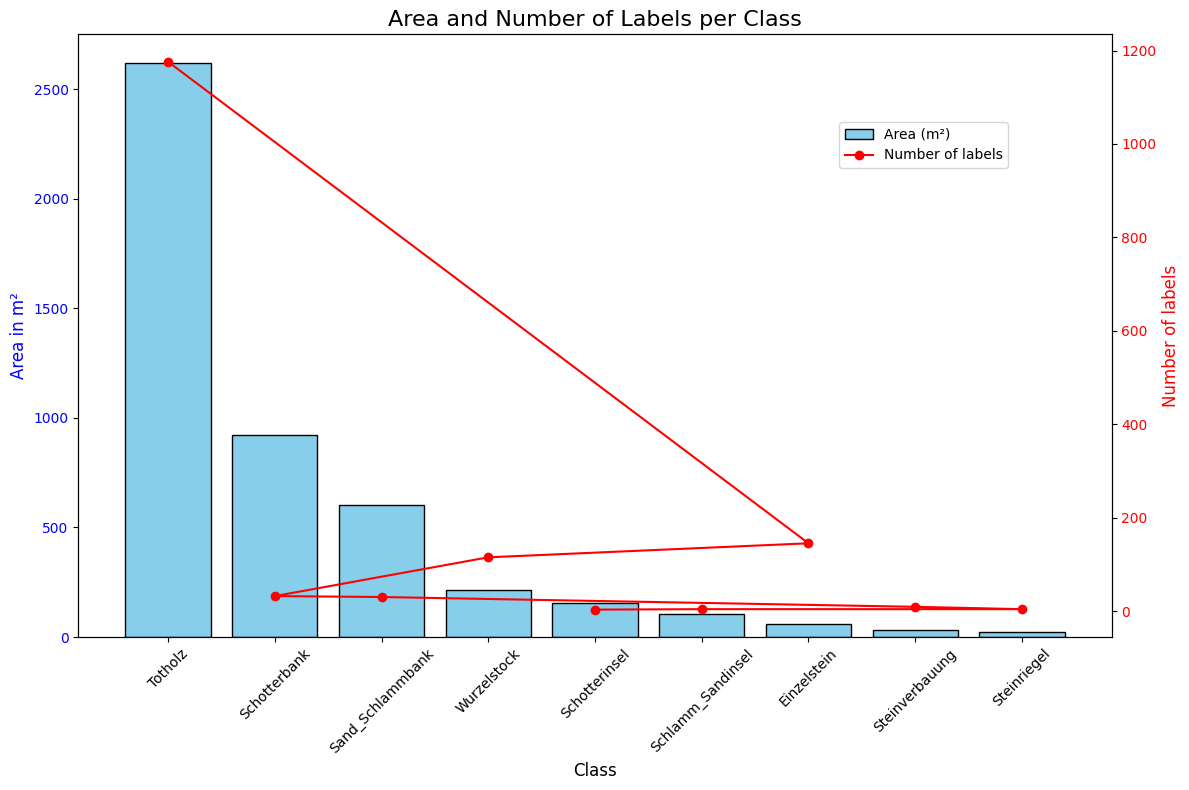

In [183]:
# ax1 = primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# area per class on axis "ax1"
ax1.bar(area_per_class.index, area_per_class.values, color="skyblue", edgecolor="black", label="Area (m²)")
ax1.set_xlabel("Class", fontsize=12)
ax1.set_ylabel("Area in m²", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.tick_params(axis="x", rotation=45)
ax1.set_title("Area and Number of Labels per Class", fontsize=16)

# number of labels per class on secondary axis "ax2"
ax2 = ax1.twinx()
ax2.plot(class_counts.index, class_counts.values, color="red", marker="o", label="Number of labels")
ax2.set_ylabel("Number of labels", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")

# add legend
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# optimize layout
plt.tight_layout()
plt.show()


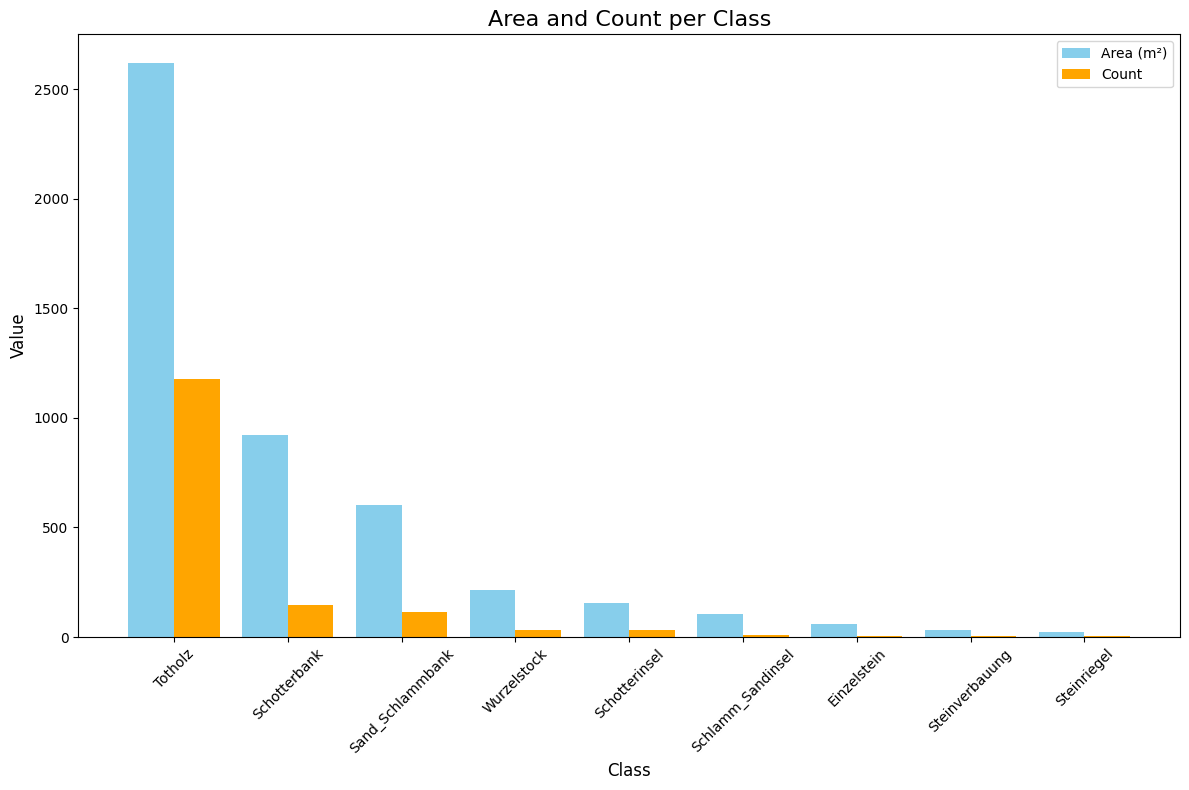

In [185]:
import numpy as np

# prepare data
classes = area_per_class.index
x = np.arange(len(classes))  # positions of the classes on the x-axis
width = 0.4  # width of the bars

# joint diagram
fig, ax = plt.subplots(figsize=(12, 8))

# bars for the area per classes (left)
ax.bar(x - width / 2, area_per_class.values, width, color="skyblue", label="Area (m²)")

# bars for the counts of labels per classes (right)
ax.bar(x + width / 2, class_counts.values, width, color="orange", label="Count")

# axis title and descriptions
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Area and Count per Class", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)

# add legend
ax.legend()

plt.tight_layout()
plt.show()
